In [4]:
# %matplotlib inline
#%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
#matplotlib.use('TkAgg')
import matplotlib.pyplot as plt

# Create t2tpa from Acces log data using a Sql quryyy

from google.cloud import bigquery
from google.cloud.bigquery import dbapi;
client = bigquery.Client("som-nero-phi-jonc101"); # Project identifier
conn = dbapi.connect(client);
cursor = conn.cursor();
query = "select jc_uid, pat_enc_csn_id_coded, t2tpa from `noshad.cohort_v2`"; # Example dataset table
cursor.execute(query);
results = cursor.fetchall();

A = np.array(results)
print(A.shape)
print(A[0,:])
Enc_ID = A[:,1]  

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/google/auth/_default.py:69: UserWarning: Your application has authenticated using end user credentials from Google Cloud SDK. We recommend that most server applications use service accounts instead. If your application continues to use end user credentials from Cloud SDK, you might receive a "quota exceeded" or "API not enabled" error. For more information about service accounts, see https://cloud.google.com/docs/authentication/
  warnings.warn(_CLOUD_SDK_CREDENTIALS_WARNING)


(264, 3)
['JCcd691a' '131018562095' '39']


### Create the patient dictionary and extract TPA times for each encounter and put it in a dictionary

In [5]:



Pat_dic = {}

for id in Enc_ID:
    #print(id)
    #print(np.where(A[:,1]==id)[0])
    #print(A[np.where(A[:,1]==id)[0],2])
    t2tpa = int(A[np.where(A[:,1]==id)[0],2])
    pat_id = A[np.where(A[:,1]==id)[0],0]
    
    #print(t2tpa)
    if t2tpa < 60*10:
        Pat_dic[id] = {} #each patient has a dictionary
        Pat_dic[id]['t2tpa'] = t2tpa
        Pat_dic[id]['pat_id'] = pat_id

## Feature: import num of all actions and add it to the patient dictionary

In [6]:


client = bigquery.Client("som-nero-phi-jonc101"); # Project identifier
conn = dbapi.connect(client);
cursor = conn.cursor();
query = "select jc_uid, pat_enc_csn_id_coded, dep_busy_all_actions from `noshad.Feature_dep_busy_all_actions`"; # Example dataset table
cursor.execute(query);
results = cursor.fetchall();

A = np.array(results)
print(A.shape)
print(A[0,:])


#with open('features/num_tnx.csv', 'r') as f:
#    A_temp = csv.reader(f)
#    temp = list(A_temp)

#print(temp[0]) # The column names

#A = np.array(temp[1:]) # array of t2tpa


for id in Pat_dic.keys():
    if A[np.where(A[:,1]==id)[0],2].shape[0] > 0:
        num_actions = float(A[np.where(A[:,1]==id)[0],2])
        Pat_dic[id]['dep_busy_all_actions'] = num_actions
    else:
        print(id)
        Pat_dic[id]['dep_busy_all_actions'] = 0


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/google/auth/_default.py:69: UserWarning: Your application has authenticated using end user credentials from Google Cloud SDK. We recommend that most server applications use service accounts instead. If your application continues to use end user credentials from Cloud SDK, you might receive a "quota exceeded" or "API not enabled" error. For more information about service accounts, see https://cloud.google.com/docs/authentication/
  warnings.warn(_CLOUD_SDK_CREDENTIALS_WARNING)


(261, 3)
['JCcb69cc' '131029086038' '11656']
131014276335
131014194983
131009784135


## plot the feature in terms of t2tpa

(264,)
(264, 1)
(264, 1)


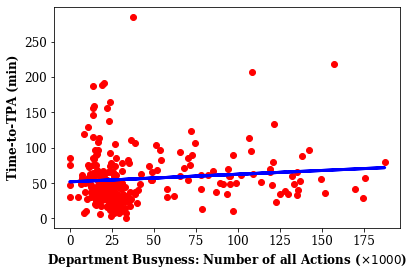

(0.1086545034988068, 0.07802363052810098)


In [35]:

from sklearn.linear_model import LinearRegression as LR

from sklearn.metrics import roc_curve
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams.update({'font.size': 12})
plt.rcParams['axes.labelweight'] = 'bold'
import time





Num_actions = np.array([Pat_dic[id]['dep_busy_all_actions'] for id in Pat_dic.keys()])/1000
Time2tpa = np.array([Pat_dic[id]['t2tpa'] for id in Pat_dic.keys()])

D = np.where(Num_actions>-1)[0]
print(D.shape)

plt.scatter(Num_actions,Time2tpa,color='r')

# Linear regression plot
Num_actions = np.reshape(Num_actions,(-1,1))
Time2tpa = np.reshape(Time2tpa,(-1,1))

print(Num_actions.shape)
print(Time2tpa.shape)

Time2tpa_regr = LR().fit(Num_actions, Time2tpa).predict(Num_actions)
plt.plot(Num_actions,Time2tpa_regr, color='blue', linewidth=3)

plt.xlabel(r'Department Busyness: Number of all Actions ($\times 1000$)')
plt.ylabel('Time-to-TPA (min)')

timestr = time.strftime("%m_%d_%Y_%H%M%S")
plt.tight_layout()
plt.savefig('figures/'+timestr +'_dep_busy_all_actions' +'.png', dpi=300)




plt.show()


from scipy.stats.stats import pearsonr 


print(pearsonr(np.reshape(Num_actions,(-1,)), np.reshape((Time2tpa),(-1,))))

## Feature: import num of clinical actions and add it to the patient dictionary

In [10]:


client = bigquery.Client("som-nero-phi-jonc101"); # Project identifier
conn = dbapi.connect(client);
cursor = conn.cursor();
query = "select jc_uid, pat_enc_csn_id_coded, dep_busy_all_actions from `noshad.Feature_dep_busy_clinical_actions`"; # Example dataset table
cursor.execute(query);
results = cursor.fetchall();

A = np.array(results)
print(A.shape)
print(A[0,:])


#with open('features/num_tnx.csv', 'r') as f:
#    A_temp = csv.reader(f)
#    temp = list(A_temp)

#print(temp[0]) # The column names

#A = np.array(temp[1:]) # array of t2tpa


for id in Pat_dic.keys():
    if A[np.where(A[:,1]==id)[0],2].shape[0] > 0:
        num_actions = float(A[np.where(A[:,1]==id)[0],2])
        Pat_dic[id]['Feature_dep_busy_clinical_actions'] = num_actions
    else:
        print(id)
        Pat_dic[id]['Feature_dep_busy_clinical_actions'] = 0



/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/google/auth/_default.py:69: UserWarning: Your application has authenticated using end user credentials from Google Cloud SDK. We recommend that most server applications use service accounts instead. If your application continues to use end user credentials from Cloud SDK, you might receive a "quota exceeded" or "API not enabled" error. For more information about service accounts, see https://cloud.google.com/docs/authentication/
  warnings.warn(_CLOUD_SDK_CREDENTIALS_WARNING)


(261, 3)
['JCcb69cc' '131029086038' '8437']
131014276335
131014194983
131009784135


## Plot the feature

(264,)
(264, 1)
(264, 1)


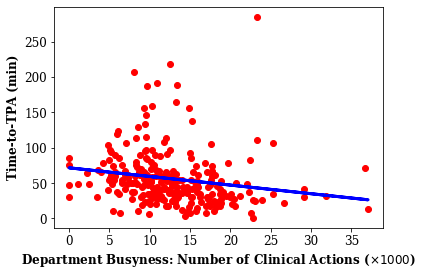

(-0.18336854708615655, 0.0027838709343982445)


In [36]:

from sklearn.linear_model import LinearRegression as LR

from sklearn.metrics import roc_curve
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams.update({'font.size': 12})
plt.rcParams['axes.labelweight'] = 'bold'
import time





Num_actions = np.array([Pat_dic[id]['Feature_dep_busy_clinical_actions'] for id in Pat_dic.keys()])/1000
Time2tpa = np.array([Pat_dic[id]['t2tpa'] for id in Pat_dic.keys()])

D = np.where(Num_actions>-1)[0]
print(D.shape)

plt.scatter(Num_actions,Time2tpa,color='r')

# Linear regression plot
Num_actions = np.reshape(Num_actions,(-1,1))
Time2tpa = np.reshape(Time2tpa,(-1,1))

print(Num_actions.shape)
print(Time2tpa.shape)

Time2tpa_regr = LR().fit(Num_actions, Time2tpa).predict(Num_actions)
plt.plot(Num_actions,Time2tpa_regr, color='blue', linewidth=3)

plt.xlabel(r'Department Busyness: Number of Clinical Actions ($\times 1000$)')
plt.ylabel('Time-to-TPA (min)')

timestr = time.strftime("%m_%d_%Y_%H%M%S")
plt.tight_layout()
plt.savefig('figures/'+timestr +'_dep_busy_clinical_actions' +'.png', dpi=300)




plt.show()


print(pearsonr(np.reshape(Num_actions,(-1,)), np.reshape((Time2tpa),(-1,))))



## Feature: import num of imaging actions and add it to the patient dictionary

In [16]:


client = bigquery.Client("som-nero-phi-jonc101"); # Project identifier
conn = dbapi.connect(client);
cursor = conn.cursor();
query = "select jc_uid, pat_enc_csn_id_coded, dep_busy_all_actions from `noshad.Feature_dep_busy_imaging_actions`"; # Example dataset table
cursor.execute(query);
results = cursor.fetchall();

A = np.array(results)
print(A.shape)
print(A[0,:])


#with open('features/num_tnx.csv', 'r') as f:
#    A_temp = csv.reader(f)
#    temp = list(A_temp)

#print(temp[0]) # The column names

#A = np.array(temp[1:]) # array of t2tpa


for id in Pat_dic.keys():
    if A[np.where(A[:,1]==id)[0],2].shape[0] > 0:
        num_actions = float(A[np.where(A[:,1]==id)[0],2])
        Pat_dic[id]['Feature_dep_busy_imaging_actions'] = num_actions
    else:
        print(id)
        Pat_dic[id]['Feature_dep_busy_imaging_actions'] = 0




/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/google/auth/_default.py:69: UserWarning: Your application has authenticated using end user credentials from Google Cloud SDK. We recommend that most server applications use service accounts instead. If your application continues to use end user credentials from Cloud SDK, you might receive a "quota exceeded" or "API not enabled" error. For more information about service accounts, see https://cloud.google.com/docs/authentication/
  warnings.warn(_CLOUD_SDK_CREDENTIALS_WARNING)


(260, 3)
['JCccb0ff' '131014194709' '5']
131192149355
131014276335
131014194983
131009784135


## Plot the Feature

(264,)
(264, 1)
(264, 1)


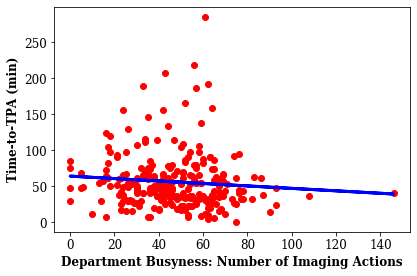

(-0.08787597642730341, 0.15450549310927775)


In [37]:

from sklearn.linear_model import LinearRegression as LR

from sklearn.metrics import roc_curve
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams.update({'font.size': 12})
plt.rcParams['axes.labelweight'] = 'bold'
import time





Num_actions = np.array([Pat_dic[id]['Feature_dep_busy_imaging_actions'] for id in Pat_dic.keys()])
Time2tpa = np.array([Pat_dic[id]['t2tpa'] for id in Pat_dic.keys()])

D = np.where(Num_actions>-1)[0]
print(D.shape)

plt.scatter(Num_actions,Time2tpa,color='r')

# Linear regression plot
Num_actions = np.reshape(Num_actions,(-1,1))
Time2tpa = np.reshape(Time2tpa,(-1,1))

print(Num_actions.shape)
print(Time2tpa.shape)

Time2tpa_regr = LR().fit(Num_actions, Time2tpa).predict(Num_actions)
plt.plot(Num_actions,Time2tpa_regr, color='blue', linewidth=3)

plt.xlabel(r'Department Busyness: Number of Imaging Actions')
plt.ylabel('Time-to-TPA (min)')

timestr = time.strftime("%m_%d_%Y_%H%M%S")
plt.tight_layout()
plt.savefig('figures/'+timestr +'_dep_busy_imaging_actions' +'.png', dpi=300)




plt.show()



print(pearsonr(np.reshape(Num_actions,(-1,)), np.reshape((Time2tpa),(-1,))))



## Feature: Number of all Active Patients

In [20]:


client = bigquery.Client("som-nero-phi-jonc101"); # Project identifier
conn = dbapi.connect(client);
cursor = conn.cursor();
query = "select jc_uid, pat_enc_csn_id_coded, dep_busy_active_pat from `noshad.Feature_dep_busy_active_pat`"; # Example dataset table
cursor.execute(query);
results = cursor.fetchall();

A = np.array(results)
print(A.shape)
print(A[0,:])


#with open('features/num_tnx.csv', 'r') as f:
#    A_temp = csv.reader(f)
#    temp = list(A_temp)

#print(temp[0]) # The column names

#A = np.array(temp[1:]) # array of t2tpa


for id in Pat_dic.keys():
    if A[np.where(A[:,1]==id)[0],2].shape[0] > 0:
        num_actions = float(A[np.where(A[:,1]==id)[0],2])
        Pat_dic[id]['Feature_dep_busy_active_pat'] = num_actions
    else:
        print(id)
        Pat_dic[id]['Feature_dep_busy_active_pat'] = 0





/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/google/auth/_default.py:69: UserWarning: Your application has authenticated using end user credentials from Google Cloud SDK. We recommend that most server applications use service accounts instead. If your application continues to use end user credentials from Cloud SDK, you might receive a "quota exceeded" or "API not enabled" error. For more information about service accounts, see https://cloud.google.com/docs/authentication/
  warnings.warn(_CLOUD_SDK_CREDENTIALS_WARNING)


(261, 3)
['JCe772ee' '131192149355' '7']
131014276335
131014194983
131009784135


# Plot the Feature

(264,)
(264, 1)
(264, 1)


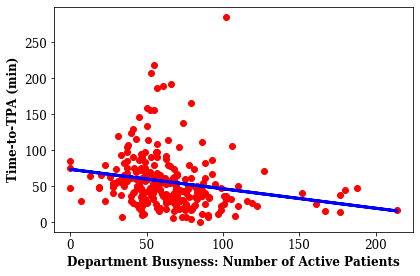

(-0.20668764195753828, 0.0007277666317775771)


In [38]:

from sklearn.linear_model import LinearRegression as LR

from sklearn.metrics import roc_curve
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams.update({'font.size': 12})
plt.rcParams['axes.labelweight'] = 'bold'
import time





Num_actions = np.array([Pat_dic[id]['Feature_dep_busy_active_pat'] for id in Pat_dic.keys()])
Time2tpa = np.array([Pat_dic[id]['t2tpa'] for id in Pat_dic.keys()])

D = np.where(Num_actions>-1)[0]
print(D.shape)

plt.scatter(Num_actions,Time2tpa,color='r')

# Linear regression plot
Num_actions = np.reshape(Num_actions,(-1,1))
Time2tpa = np.reshape(Time2tpa,(-1,1))

print(Num_actions.shape)
print(Time2tpa.shape)

Time2tpa_regr = LR().fit(Num_actions, Time2tpa).predict(Num_actions)
plt.plot(Num_actions,Time2tpa_regr, color='blue', linewidth=3)

plt.xlabel(r'Department Busyness: Number of Active Patients')
plt.ylabel('Time-to-TPA (min)')

timestr = time.strftime("%m_%d_%Y_%H%M%S")
plt.tight_layout()
plt.savefig('figures/'+timestr +'_dep_busy_active_pat' +'.png', dpi=300)




plt.show()



print(pearsonr(np.reshape(Num_actions,(-1,)), np.reshape((Time2tpa),(-1,))))




## Feature: Provider Busyness, Number of Clinical Actions

In [22]:


client = bigquery.Client("som-nero-phi-jonc101"); # Project identifier
conn = dbapi.connect(client);
cursor = conn.cursor();
query = "select jc_uid, pat_enc_csn_id_coded, prov_busy_all_actions from `noshad.Feature_prov_busy_all_actions`"; # Example dataset table
cursor.execute(query);
results = cursor.fetchall();

A = np.array(results)
print(A.shape)
print(A[0,:])


#with open('features/num_tnx.csv', 'r') as f:
#    A_temp = csv.reader(f)
#    temp = list(A_temp)

#print(temp[0]) # The column names

#A = np.array(temp[1:]) # array of t2tpa


for id in Pat_dic.keys():
    if A[np.where(A[:,1]==id)[0],2].shape[0] > 0:
        num_actions = float(A[np.where(A[:,1]==id)[0],2])
        Pat_dic[id]['Feature_prov_busy_all_actions'] = num_actions
    else:
        print(id)
        Pat_dic[id]['Feature_prov_busy_all_actions'] = 0






/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/google/auth/_default.py:69: UserWarning: Your application has authenticated using end user credentials from Google Cloud SDK. We recommend that most server applications use service accounts instead. If your application continues to use end user credentials from Cloud SDK, you might receive a "quota exceeded" or "API not enabled" error. For more information about service accounts, see https://cloud.google.com/docs/authentication/
  warnings.warn(_CLOUD_SDK_CREDENTIALS_WARNING)


(226, 3)
['JCccb0ff' '131014194709' '48.77777777777778']
131042907349
131200184460
131061494475
131067184000
131220003723
131012891143
131064361518
131082126635
131176161179
131020557927
131026081770
131018945531
131027180630
131079163021
131209193525
131014553731
131164013161
131192149355
131021801903
131054492808
131103562930
131194574284
131029787108
131014276335
131068658088
131190358231
131014194983
131026160544
131194806134
131072133943
131023986529
131026361301
131040474707
131015684005
131026682230
131009784135
131030331863
131176444751


## Plot the Feature

(226,)
(226, 1)
(226, 1)


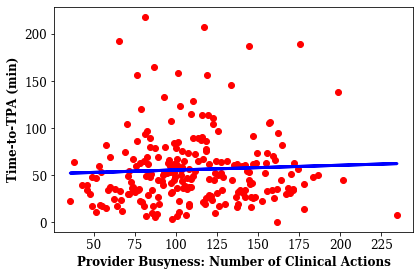

In [24]:

from sklearn.linear_model import LinearRegression as LR

from sklearn.metrics import roc_curve
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams.update({'font.size': 12})
plt.rcParams['axes.labelweight'] = 'bold'
import time



Num_actions = np.array([Pat_dic[id]['Feature_prov_busy_all_actions'] for id in Pat_dic.keys() if Pat_dic[id]['Feature_prov_busy_all_actions']>0])
Time2tpa = np.array([Pat_dic[id]['t2tpa'] for id in Pat_dic.keys() if Pat_dic[id]['Feature_prov_busy_all_actions']>0])

D = np.where(Num_actions>-1)[0]
print(D.shape)

plt.scatter(Num_actions,Time2tpa,color='r')

# Linear regression plot
Num_actions = np.reshape(Num_actions,(-1,1))
Time2tpa = np.reshape(Time2tpa,(-1,1))

print(Num_actions.shape)
print(Time2tpa.shape)

Time2tpa_regr = LR().fit(Num_actions, Time2tpa).predict(Num_actions)
plt.plot(Num_actions,Time2tpa_regr, color='blue', linewidth=3)

plt.xlabel('Provider Busyness: Number of Clinical Actions')
plt.ylabel('Time-to-TPA (min)')

timestr = time.strftime("%m_%d_%Y_%H%M%S")
plt.tight_layout()
plt.savefig('figures/'+timestr +'_prov_busy_all_actions' +'.png', dpi=300)




plt.show()







## Feature: Provider Busyness Number of Specific Actions

In [25]:


client = bigquery.Client("som-nero-phi-jonc101"); # Project identifier
conn = dbapi.connect(client);
cursor = conn.cursor();
query = "select jc_uid, pat_enc_csn_id_coded, prov_busy_specific_actions from `noshad.Feature_prov_busy_specific_actions`"; # Example dataset table
cursor.execute(query);
results = cursor.fetchall();

A = np.array(results)
print(A.shape)
print(A[0,:])


#with open('features/num_tnx.csv', 'r') as f:
#    A_temp = csv.reader(f)
#    temp = list(A_temp)

#print(temp[0]) # The column names

#A = np.array(temp[1:]) # array of t2tpa


for id in Pat_dic.keys():
    if A[np.where(A[:,1]==id)[0],2].shape[0] > 0:
        num_actions = float(A[np.where(A[:,1]==id)[0],2])
        Pat_dic[id]['Feature_prov_busy_specific_actions'] = num_actions
    else:
        print(id)
        Pat_dic[id]['Feature_prov_busy_specific_actions'] = 0







/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/google/auth/_default.py:69: UserWarning: Your application has authenticated using end user credentials from Google Cloud SDK. We recommend that most server applications use service accounts instead. If your application continues to use end user credentials from Cloud SDK, you might receive a "quota exceeded" or "API not enabled" error. For more information about service accounts, see https://cloud.google.com/docs/authentication/
  warnings.warn(_CLOUD_SDK_CREDENTIALS_WARNING)


(226, 3)
['JCce668e' '131024061523' '23.0']
131042907349
131200184460
131061494475
131067184000
131220003723
131012891143
131064361518
131082126635
131176161179
131020557927
131026081770
131018945531
131027180630
131079163021
131209193525
131014553731
131164013161
131192149355
131021801903
131054492808
131103562930
131194574284
131029787108
131014276335
131068658088
131190358231
131014194983
131026160544
131194806134
131072133943
131023986529
131026361301
131040474707
131015684005
131026682230
131009784135
131030331863
131176444751


## Feature: Plot 

(226,)
(226, 1)
(226, 1)


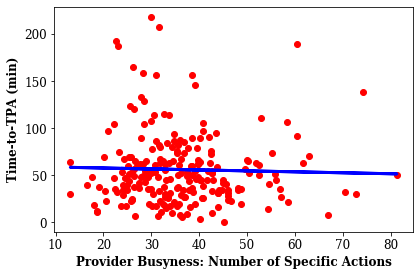

(-0.029699702773484098, 0.6569654976017)


In [39]:

from sklearn.linear_model import LinearRegression as LR

from sklearn.metrics import roc_curve
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams.update({'font.size': 12})
plt.rcParams['axes.labelweight'] = 'bold'
import time



Num_actions = np.array([Pat_dic[id]['Feature_prov_busy_specific_actions'] for id in Pat_dic.keys() if Pat_dic[id]['Feature_prov_busy_specific_actions']>0])
Time2tpa = np.array([Pat_dic[id]['t2tpa'] for id in Pat_dic.keys() if Pat_dic[id]['Feature_prov_busy_specific_actions']>0])

D = np.where(Num_actions>-1)[0]
print(D.shape)

plt.scatter(Num_actions,Time2tpa,color='r')

# Linear regression plot
Num_actions = np.reshape(Num_actions,(-1,1))
Time2tpa = np.reshape(Time2tpa,(-1,1))

print(Num_actions.shape)
print(Time2tpa.shape)

Time2tpa_regr = LR().fit(Num_actions, Time2tpa).predict(Num_actions)
plt.plot(Num_actions,Time2tpa_regr, color='blue', linewidth=3)

plt.xlabel('Provider Busyness: Number of Specific Actions')
plt.ylabel('Time-to-TPA (min)')

timestr = time.strftime("%m_%d_%Y_%H%M%S")
plt.tight_layout()
plt.savefig('figures/'+timestr +'_prov_busy_specific_actions' +'.png', dpi=300)




plt.show()



print(pearsonr(np.reshape(Num_actions,(-1,)), np.reshape((Time2tpa),(-1,))))






## Feature: Provider Busyness Number of all Active Patients

In [27]:


client = bigquery.Client("som-nero-phi-jonc101"); # Project identifier
conn = dbapi.connect(client);
cursor = conn.cursor();
query = "select jc_uid, pat_enc_csn_id_coded, prov_busy_num_pat from `noshad.Feature_prov_busy_num_pat`"; # Example dataset table
cursor.execute(query);
results = cursor.fetchall();

A = np.array(results)
print(A.shape)
print(A[0,:])


#with open('features/num_tnx.csv', 'r') as f:
#    A_temp = csv.reader(f)
#    temp = list(A_temp)

#print(temp[0]) # The column names

#A = np.array(temp[1:]) # array of t2tpa


for id in Pat_dic.keys():
    if A[np.where(A[:,1]==id)[0],2].shape[0] > 0:
        num_actions = float(A[np.where(A[:,1]==id)[0],2])
        Pat_dic[id]['Feature_prov_busy_num_pat'] = num_actions
    else:
        print(id)
        Pat_dic[id]['Feature_prov_busy_num_pat'] = 0








/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/google/auth/_default.py:69: UserWarning: Your application has authenticated using end user credentials from Google Cloud SDK. We recommend that most server applications use service accounts instead. If your application continues to use end user credentials from Cloud SDK, you might receive a "quota exceeded" or "API not enabled" error. For more information about service accounts, see https://cloud.google.com/docs/authentication/
  warnings.warn(_CLOUD_SDK_CREDENTIALS_WARNING)


(226, 3)
['JCccb0ff' '131014194709' '3.1111111111111116']
131042907349
131200184460
131061494475
131067184000
131220003723
131012891143
131064361518
131082126635
131176161179
131020557927
131026081770
131018945531
131027180630
131079163021
131209193525
131014553731
131164013161
131192149355
131021801903
131054492808
131103562930
131194574284
131029787108
131014276335
131068658088
131190358231
131014194983
131026160544
131194806134
131072133943
131023986529
131026361301
131040474707
131015684005
131026682230
131009784135
131030331863
131176444751


## Plot the Feature

(226,)
(226, 1)
(226, 1)


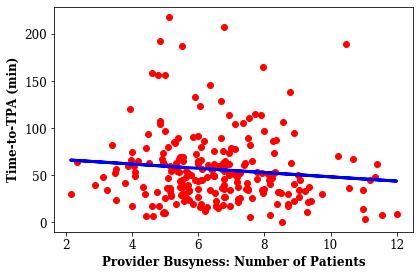

(-0.10932365713742515, 0.10115107073019175)


In [40]:

from sklearn.linear_model import LinearRegression as LR

from sklearn.metrics import roc_curve
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams.update({'font.size': 12})
plt.rcParams['axes.labelweight'] = 'bold'
import time



Num_actions = np.array([Pat_dic[id]['Feature_prov_busy_num_pat'] for id in Pat_dic.keys() if Pat_dic[id]['Feature_prov_busy_num_pat']>0])
Time2tpa = np.array([Pat_dic[id]['t2tpa'] for id in Pat_dic.keys() if Pat_dic[id]['Feature_prov_busy_num_pat']>0])

D = np.where(Num_actions>-1)[0]
print(D.shape)

plt.scatter(Num_actions,Time2tpa,color='r')

# Linear regression plot
Num_actions = np.reshape(Num_actions,(-1,1))
Time2tpa = np.reshape(Time2tpa,(-1,1))

print(Num_actions.shape)
print(Time2tpa.shape)

Time2tpa_regr = LR().fit(Num_actions, Time2tpa).predict(Num_actions)
plt.plot(Num_actions,Time2tpa_regr, color='blue', linewidth=3)

plt.xlabel('Provider Busyness: Number of Patients')
plt.ylabel('Time-to-TPA (min)')

timestr = time.strftime("%m_%d_%Y_%H%M%S")
plt.tight_layout()
plt.savefig('figures/'+timestr +'_prov_busy_num_pat' +'.png', dpi=300)




plt.show()


print(pearsonr(np.reshape(Num_actions,(-1,)), np.reshape((Time2tpa),(-1,))))








## Feature: Team Size

In [29]:


client = bigquery.Client("som-nero-phi-jonc101"); # Project identifier
conn = dbapi.connect(client);
cursor = conn.cursor();
query = "select jc_uid, pat_enc_csn_id_coded, team_size from `noshad.Feature_prov_busy_num_pat`"; # Example dataset table
cursor.execute(query);
results = cursor.fetchall();

A = np.array(results)
print(A.shape)
print(A[0,:])


#with open('features/num_tnx.csv', 'r') as f:
#    A_temp = csv.reader(f)
#    temp = list(A_temp)

#print(temp[0]) # The column names

#A = np.array(temp[1:]) # array of t2tpa


for id in Pat_dic.keys():
    if A[np.where(A[:,1]==id)[0],2].shape[0] > 0:
        num_actions = float(A[np.where(A[:,1]==id)[0],2])
        Pat_dic[id]['team_size'] = num_actions
    else:
        print(id)
        Pat_dic[id]['team_size'] = 0





/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/google/auth/_default.py:69: UserWarning: Your application has authenticated using end user credentials from Google Cloud SDK. We recommend that most server applications use service accounts instead. If your application continues to use end user credentials from Cloud SDK, you might receive a "quota exceeded" or "API not enabled" error. For more information about service accounts, see https://cloud.google.com/docs/authentication/
  warnings.warn(_CLOUD_SDK_CREDENTIALS_WARNING)


(226, 3)
['JCccb0ff' '131014194709' '9']
131042907349
131200184460
131061494475
131067184000
131220003723
131012891143
131064361518
131082126635
131176161179
131020557927
131026081770
131018945531
131027180630
131079163021
131209193525
131014553731
131164013161
131192149355
131021801903
131054492808
131103562930
131194574284
131029787108
131014276335
131068658088
131190358231
131014194983
131026160544
131194806134
131072133943
131023986529
131026361301
131040474707
131015684005
131026682230
131009784135
131030331863
131176444751


# Plot the Feature

(226,)
(226, 1)
(226, 1)


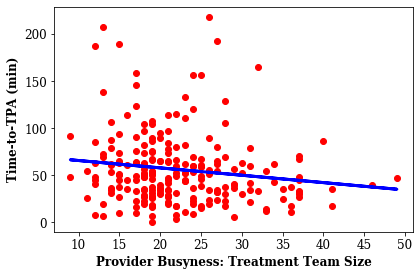

(-0.14593511387147437, 0.02827303771793398)


In [41]:

from sklearn.linear_model import LinearRegression as LR

from sklearn.metrics import roc_curve
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams.update({'font.size': 12})
plt.rcParams['axes.labelweight'] = 'bold'
import time



Num_actions = np.array([Pat_dic[id]['team_size'] for id in Pat_dic.keys() if Pat_dic[id]['team_size']>0])
Time2tpa = np.array([Pat_dic[id]['t2tpa'] for id in Pat_dic.keys() if Pat_dic[id]['team_size']>0])

D = np.where(Num_actions>-1)[0]
print(D.shape)

plt.scatter(Num_actions,Time2tpa,color='r')

# Linear regression plot
Num_actions = np.reshape(Num_actions,(-1,1))
Time2tpa = np.reshape(Time2tpa,(-1,1))

print(Num_actions.shape)
print(Time2tpa.shape)

Time2tpa_regr = LR().fit(Num_actions, Time2tpa).predict(Num_actions)
plt.plot(Num_actions,Time2tpa_regr, color='blue', linewidth=3)

plt.xlabel('Provider Busyness: Treatment Team Size')
plt.ylabel('Time-to-TPA (min)')

timestr = time.strftime("%m_%d_%Y_%H%M%S")
plt.tight_layout()
plt.savefig('figures/'+timestr +'_team_size' +'.png', dpi=300)




plt.show()



print(pearsonr(np.reshape(Num_actions,(-1,)), np.reshape((Time2tpa),(-1,))))






